In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import pandas as pd

file_path = 'listings_combined.csv'
df = pd.read_csv(file_path)

# Show first few rows
df.head()


<ipython-input-1-96b16af6c55c>:4: DtypeWarning: Columns (2,22,29,41,49,59,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,75212.0,https://www.airbnb.com/rooms/75212,20250301213405,2025-03-03,city scrape,Sunny Room only in town house nr Long Beach…,"A bright & sunny room ONLY with full size bed,...","A really lovely area, with so many restaurants...",https://a0.muscache.com/pictures/e3cff12f-d518...,343761.0,...,4.89,4.83,NaN,f,1.0,0.0,1.0,0.0,0.46,Los Angeles
1,76561.0,https://www.airbnb.com/rooms/76561,20250301213405,2025-03-03,city scrape,420 Friendly Sweet Lil' Guesthouse by Sofi & LAX,-420 Friendly Airbnb Stay in LA!-<br />(16 to ...,Q: WHAT'S THE NEIGHBORHOOD LIKE?<br /><br />A:...,https://a0.muscache.com/pictures/23627d22-d977...,403838.0,...,4.70,4.79,NaN,f,4.0,4.0,0.0,0.0,5.30,Los Angeles
2,79502.0,https://www.airbnb.com/rooms/79502,20250301213405,2025-03-03,city scrape,Silver Lake million dollar view * luxe patio,"Walk to Sunset Junction, the Polka Dot triangl...",We have the absolute iconic views of downtown...,https://a0.muscache.com/pictures/miso/Hosting-...,428171.0,...,4.94,4.73,NaN,f,2.0,2.0,0.0,0.0,1.78,Los Angeles
3,79832.0,https://www.airbnb.com/rooms/79832,20250301213405,2025-03-02,city scrape,Guest Quarters @ the Hollywood Sign,Guest House,NaN,https://a0.muscache.com/pictures/541078/35c6dc...,28569.0,...,4.93,4.91,HSR19-002716,f,1.0,1.0,0.0,0.0,2.84,Los Angeles
4,80714.0,https://www.airbnb.com/rooms/80714,20250301213405,2025-03-03,city scrape,Cozy secluded Guesthouse in Garden,Sierra Bonita Guesthouse in Garden setting:<br...,We are very central to so many tourist destina...,https://a0.muscache.com/pictures/2080263/2d8a6...,436647.0,...,4.95,4.88,HSR19-003488,f,1.0,1.0,0.0,0.0,1.16,Los Angeles


In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
# # 1. Clean `price` and engineer `num_amenities`
# df['price'] = (
#     df['price']
#     .str.replace(r'[\$,]', '', regex=True)
#     #.astype(float)
# )
# df['amenities_list'] = (
#     df['amenities']
#     .str.strip('{}')
#     .str.replace('"', '', regex=False)
#     .str.split(',')
# )
# df['num_amenities'] = df['amenities_list'].apply(len)
# Ensure 'price' is a string and clean it, then convert to float
df['price'] = (
    df['price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)

# Ensure 'amenities' is a string for string operations
df['amenities'] = df['amenities'].astype(str)

# Parse 'amenities' into a list
df['amenities_list'] = (
    df['amenities']
    .str.strip('{}')
    .str.replace('"', '', regex=False)
    .str.split(',')
)

# Count the number of amenities
df['num_amenities'] = df['amenities_list'].apply(len)



In [5]:
# 2. Drop listings with missing numerics; fill missing categoricals
numeric_feats = ['price','num_amenities','bathrooms','bedrooms','beds','review_scores_rating']
cat_feats     = ['room_type','neighbourhood_cleansed','property_type']

df_clean = df.dropna(subset=numeric_feats).copy()
for c in cat_feats:
    df_clean[c] = df_clean[c].fillna('Unknown')


In [6]:


# 3. Build & fit the preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),                numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

X_for_transform = df_clean[numeric_feats + cat_feats]
preprocessor.fit(X_for_transform)

print("Preprocessor fitted on cleaned data")


Preprocessor fitted on cleaned data


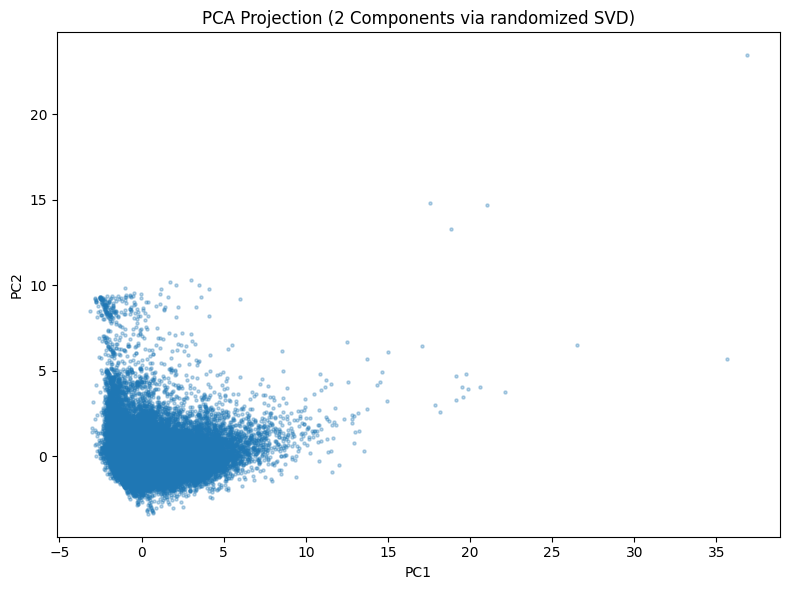

Explained variance ratios (2 components): [0.70815299 0.29184701]


In [7]:
# ─── CELL 4: PCA VIA RANDOMIZED SVD ───
import numpy as np
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt

# Transform & center
X = preprocessor.transform(df_clean[numeric_feats + cat_feats])
X_centered = X - X.mean(axis=0)

# Compute 2-component randomized SVD
U, Sigma, VT = randomized_svd(X_centered, n_components=2, n_iter=5, random_state=42)
X_pca = U * Sigma

# Plot projection
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.3)
plt.title("PCA Projection (2 Components via randomized SVD)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# Explained variance
explained_variance = Sigma**2 / np.sum(Sigma**2)
print("Explained variance ratios (2 components):", explained_variance)


In [8]:
# ─── CELL 5: K-MEANS CLUSTERING + SILHOUETTE ANALYSIS ───
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try k = 2…6
sil_scores = {}
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sil_scores[k] = silhouette_score(X, labels)
    print(f"k={k}: silhouette = {sil_scores[k]:.4f}")

# Choose best k
k_best = max(sil_scores, key=sil_scores.get)
print(f"Best k by silhouette: {k_best}")

# Fit final model & assign clusters
kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X)


k=2: silhouette = 0.2775
k=3: silhouette = 0.2804
k=4: silhouette = 0.1763
k=5: silhouette = 0.1278
k=6: silhouette = 0.1254
Best k by silhouette: 3


In [9]:
import numpy as np
import pandas as pd
from sklearn.utils.extmath import randomized_svd
import plotly.express as px

# 1. Re-run your preprocessing & clustering cells to repopulate:
#    df_clean, preprocessor, numeric_feats, cat_feats, and df_clean['cluster']

# 2. Transform & center for PCA
X_full = preprocessor.transform(df_clean[numeric_feats + cat_feats])
X_centered = X_full - X_full.mean(axis=0)

# 3. Compute 2D projection via randomized SVD
U, Sigma, VT = randomized_svd(X_centered, n_components=2, n_iter=5, random_state=42)
X_pca = U * Sigma

# 4. Map your cluster numbers to human-readable names
cluster_map = {0: 'Budget stay', 1: 'Family friendly', 2: 'Luxury'}
plot_df = pd.DataFrame({
    'PC1': X_pca[:,0],
    'PC2': X_pca[:,1],
    'Segment': df_clean['cluster'].map(cluster_map)
})

# 5. Plot
fig = px.scatter(
    plot_df, x='PC1', y='PC2',
    color='Segment',
    title='Airbnb Market Segments in PCA Space',
    labels={'PC1':'PC1','PC2':'PC2'},
    width=800, height=600
)
fig.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse

# 1. Get base features from preprocessor
X_base = preprocessor.transform(df_clean[numeric_feats + cat_feats])

# If X_base is sparse, convert to dense
if sparse.issparse(X_base):
    Xb = X_base.toarray()
else:
    Xb = np.asarray(X_base)

print("Forced Xb shape:", Xb.shape, " dtype:", Xb.dtype)

# 2. One-hot encode cluster column
clusters_oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore') \
    .fit_transform(df_clean[['cluster']])
Ch = np.asarray(clusters_oh)

print("Forced Ch shape:", Ch.shape, " dtype:", Ch.dtype)

# 3. Combine base features and cluster one-hot
X_reg = np.column_stack((Xb, Ch))
print("X_reg final shape:", X_reg.shape)

# 4. Target variable
y = np.asarray(df_clean['price'].values)
print("y shape:", y.shape)

# 5. Manual Ridge Regression with 5-fold CV
n, p = X_reg.shape
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
folds = np.array_split(idx, 5)

alpha = 1.0
mae_scores = []

for fold in folds:
    test = fold
    train = np.setdiff1d(idx, test)
    X_tr, y_tr = X_reg[train], y[train]
    X_te, y_te = X_reg[test], y[test]

    I = np.eye(p)
    β = np.linalg.inv(X_tr.T @ X_tr + alpha * I) @ (X_tr.T @ y_tr)
    y_pred = X_te @ β

    mae_scores.append(np.mean(np.abs(y_te - y_pred)))

print(f"\nManual Ridge MAE (5-fold CV): Mean = ${np.mean(mae_scores):.2f}, Std = ${np.std(mae_scores):.2f}")


Forced Xb shape: (74484, 593)  dtype: float64
Forced Ch shape: (74484, 3)  dtype: float64
X_reg final shape: (74484, 596)
y shape: (74484,)

Manual Ridge MAE (5-fold CV): Mean = $0.03, Std = $0.00


In [11]:
# ─── CELL 6 (UPDATED): BUILD A REGRESSION-ONLY PREPROCESSOR ───
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Define the regression feature lists (no 'price')
numeric_reg_feats = ['num_amenities', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
cat_reg_feats     = ['room_type', 'neighbourhood_cleansed', 'property_type']

# 2. Build pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# 3. Combine into a ColumnTransformer
reg_preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_reg_feats),
    ('cat', cat_pipeline, cat_reg_feats),
])

# 4. Fit on the cleaned DataFrame
reg_preprocessor.fit(df_clean[numeric_reg_feats + cat_reg_feats])

# 5. Transform to get X_base
X_base = reg_preprocessor.transform(df_clean[numeric_reg_feats + cat_reg_feats])
print("X_base shape:", X_base.shape)

# 6. One-hot encode clusters
cluster_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
clusters_oh = cluster_enc.fit_transform(df_clean[['cluster']])
print("clusters_oh shape:", clusters_oh.shape)

# 7. Stack them
X_reg = np.hstack((X_base, clusters_oh))
print("X_reg shape:", X_reg.shape)

# 8. Target
y = df_clean['price'].values
print("y shape:", y.shape)

# 9. Manual Ridge 5-fold CV
n, p = X_reg.shape
indices = np.arange(n)
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, 5)

alpha = 1.0
mae_scores = []
for fold in folds:
    test  = fold
    train = np.setdiff1d(indices, test)
    X_tr, y_tr = X_reg[train], y[train]
    X_te, y_te = X_reg[test],  y[test]
    I = np.eye(p)
    β = np.linalg.inv(X_tr.T @ X_tr + alpha * I) @ (X_tr.T @ y_tr)
    y_pred = X_te @ β
    mae_scores.append(np.mean(np.abs(y_te - y_pred)))

print(f"\nCorrected Ridge MAE (5-fold CV): Mean = ${np.mean(mae_scores):.2f}, Std = ${np.std(mae_scores):.2f}")


X_base shape: (74484, 592)
clusters_oh shape: (74484, 3)
X_reg shape: (74484, 595)
y shape: (74484,)

Corrected Ridge MAE (5-fold CV): Mean = $153.44, Std = $3.36


In [13]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Assumes X_reg (features) and y (prices) are already defined

# 1) Define the models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=-1, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42, verbose=False),
}

# 2) 5-fold manual CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    maes = []
    for train_idx, test_idx in kf.split(X_reg):
        X_tr, X_te = X_reg[train_idx], X_reg[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        maes.append(mean_absolute_error(y_te, y_pred))
    results.append({
        'Model': name,
        'MAE Mean': np.mean(maes),
        'MAE Std': np.std(maes)
    })

# 3) Display
results_df = pd.DataFrame(results).sort_values('MAE Mean')
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 59587, number of used features: 367
[LightGBM] [Info] Start training from score 294.666655


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 59587, number of used features: 364
[LightGBM] [Info] Start training from score 296.884421


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 59587, number of used features: 366
[LightGBM] [Info] Start training from score 292.973333


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 979
[LightGBM] [Info] Number of data points in the train set: 59587, number of used features: 363
[LightGBM] [Info] Start training from score 294.876147


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 59588, number of used features: 366
[LightGBM] [Info] Start training from score 295.282926


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



      Model    MAE Mean   MAE Std
0   XGBoost  121.572096  2.923821
1  LightGBM  124.259051  1.764906
2  CatBoost  127.741454  2.742966


In [15]:
import numpy as np
import pandas as pd
import plotly.express as px

# 1. Reconstruct X_reg and y (from your regression prep)
#    Make sure df_clean, reg_preprocessor, and cluster_enc are in memory

numeric_reg_feats = ['num_amenities', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
cat_reg_feats     = ['room_type', 'neighbourhood_cleansed', 'property_type']

X_base     = reg_preprocessor.transform(df_clean[numeric_reg_feats + cat_reg_feats])
clusters_oh = cluster_enc.transform(df_clean[['cluster']])
X_reg, y    = np.hstack([X_base, clusters_oh]), df_clean['price'].values

# 2. Build feature names
feat_names = numeric_reg_feats.copy()
ohe = reg_preprocessor.named_transformers_['cat'].named_steps['onehot']
feat_names += list(ohe.get_feature_names_out(cat_reg_feats))
feat_names += list(cluster_enc.get_feature_names_out(['cluster']))

# 3. Compute closed-form Ridge coefficients
alpha = 1.0
I     = np.eye(X_reg.shape[1])
beta  = np.linalg.inv(X_reg.T @ X_reg + alpha * I) @ (X_reg.T @ y)

# 4. Normalize importances so they sum to 1
imp       = np.abs(beta)
imp_norm  = imp / np.sum(imp)

# 5. Make DataFrame and select top 20
feat_imp_df = pd.DataFrame({'feature': feat_names, 'importance': imp_norm})
top20 = feat_imp_df.sort_values('importance', ascending=False).head(20)

# 6. Plot normalized importances
fig = px.bar(
    top20,
    x='importance',
    y='feature',
    orientation='h',
    title='Top 20 Feature Importances (Normalized, Sum=1)',
    labels={'importance':'Normalized Importance','feature':'Feature'},
    height=600
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [16]:
feature_importances = list(zip(feat_names, imp_norm))
top20_list = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:20]

# 4. Print
for feature, importance in top20_list:
    print(f"{feature}: {importance:.4f}")

property_type_Room in serviced apartment: 0.1039
neighbourhood_cleansed_Citrus: 0.0235
neighbourhood_cleansed_Malibu: 0.0137
property_type_Shared room in rental unit: 0.0133
property_type_Shared room in bed and breakfast: 0.0125
neighbourhood_cleansed_Bel-Air: 0.0106
neighbourhood_cleansed_Moreno Mission: 0.0104
property_type_Private room in hostel: 0.0088
property_type_Windmill: 0.0084
neighbourhood_cleansed_Unincorporated Catalina Island: 0.0084
property_type_Shared room in villa: 0.0084
property_type_Castle: 0.0081
property_type_Hotel room: 0.0071
room_type_Hotel room: 0.0069
neighbourhood_cleansed_El Monte: 0.0067
neighbourhood_cleansed_Lahaina: 0.0067
neighbourhood_cleansed_Castro/Upper Market: 0.0065
property_type_Room in bed and breakfast: 0.0060
neighbourhood_cleansed_Beverly Crest: 0.0059
property_type_Entire villa: 0.0057


In [17]:
feat_imp_df = pd.DataFrame({
    'feature': feat_names,
    'importance': np.abs(beta)
}).sort_values('importance', ascending=False).reset_index(drop=True)

# 8. Plot top 20
top20 = feat_imp_df.head(20)
fig = px.bar(
    top20,
    x='importance',
    y='feature',
    orientation='h',
    title='Top 20 Feature Importances (Ridge Regression)',
    labels={'importance':'|Coefficient|', 'feature':'Feature'}
)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)
fig.show()

In [18]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import itertools
import random
import pandas as pd

# 1) Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_reg, label=y)

# 2) Parameter grid to sample from
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth':      [3, 5, 7, 9],
    'subsample':      [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
all_combinations = list(itertools.product(
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['subsample'],
    param_grid['colsample_bytree'],
))

# 3) Randomly sample 10 combinations
random.seed(42)
sampled = random.sample(all_combinations, 10)

best_score = float('inf')
best_params = None
records = []

for lr, md, ss, cs in sampled:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'learning_rate': lr,
        'max_depth': md,
        'subsample': ss,
        'colsample_bytree': cs,
        'seed': 42,
        'verbosity': 0
    }
    # 4) xgb.cv with early stopping
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=200,
        nfold=5,
        early_stopping_rounds=10,
        metrics='mae',
        seed=42,
        verbose_eval=False
    )
    mean_mae = cv_results['test-mae-mean'].min()
    records.append({**params, 'mae': mean_mae})
    if mean_mae < best_score:
        best_score = mean_mae
        best_params = params

# 5) Show results
results_df = pd.DataFrame(records).sort_values('mae').reset_index(drop=True)
print("Top 5 parameter sets:")
print(results_df.head())

print("\nBest MAE: ${:.2f}".format(best_score))
print("Best params:", best_params)


Top 5 parameter sets:
          objective eval_metric  learning_rate  max_depth  subsample  \
0  reg:squarederror         mae           0.20          9        0.8   
1  reg:squarederror         mae           0.05          9        1.0   
2  reg:squarederror         mae           0.05          7        1.0   
3  reg:squarederror         mae           0.05          7        0.8   
4  reg:squarederror         mae           0.01          9        0.6   

   colsample_bytree  seed  verbosity         mae  
0               0.8    42          0  116.801250  
1               0.8    42          0  119.184310  
2               1.0    42          0  122.225649  
3               0.6    42          0  122.437702  
4               0.8    42          0  130.082651  

Best MAE: $116.80
Best params: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'learning_rate': 0.2, 'max_depth': 9, 'subsample': 0.8, 'colsample_bytree': 0.8, 'seed': 42, 'verbosity': 0}


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# 1) Subsample 20% for tuning
X_sub, _, y_sub, _ = train_test_split(X_reg, y, test_size=0.8, random_state=42)

# 2) Define an XGBoost and a small search space
xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
param_dist = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth':      [3, 6],
    'subsample':      [0.7, 1.0]
}

# 3) 3-fold CV on the subsample
cv = KFold(n_splits=3, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=5,
    scoring=mae_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1
)
search.fit(X_sub, y_sub)

print("Best params (on 20% sample):", search.best_params_)
print("Tuning MAE (CV):", -search.best_score_)


Best params (on 20% sample): {'subsample': 0.7, 'max_depth': 6, 'learning_rate': 0.2}
Tuning MAE (CV): 127.95493355725331


In [ ]:
2